In [13]:
import glob
import pathlib

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
def get_train_valid_subsets(data_path, /, valid_ratio=0.2, seed=None):
    defective_paths = glob.glob(str(data_path / "defective/*"))
    good_paths = glob.glob(str(data_path / "good/*"))
    paths = np.concatenate((defective_paths, good_paths))

    defective_labels = [0] * len(defective_paths)
    good_labels = [1] * len(good_paths)
    labels = np.concatenate((defective_labels, good_labels))

    return train_test_split(
        paths, labels, test_size=valid_ratio, random_state=seed, stratify=labels
    )

In [3]:
dataset_path = pathlib.Path("../data/raw/Digital images of defective and good condition tyres")

train_paths, valid_paths, train_labels, valid_labels = get_train_valid_subsets(
    dataset_path, valid_ratio=0.125, seed=42
)

print("Training Image Paths:\n")
print(train_paths[:3])
print("\nTraining Labels:", train_labels[:3])

Training Image Paths:

['..\\data\\raw\\Digital images of defective and good condition tyres\\defective\\Defective (619).jpg'
 '..\\data\\raw\\Digital images of defective and good condition tyres\\good\\good (678).jpg'
 '..\\data\\raw\\Digital images of defective and good condition tyres\\defective\\Defective (411).jpg']

Training Labels: [0 1 0]


In [4]:
print("Defective/Good ratio in train: ", np.bincount(train_labels) / len(train_labels))
print("Defective/Good ratio in valid: ", np.bincount(valid_labels) / len(valid_labels))

Defective/Good ratio in train:  [0.55418719 0.44581281]
Defective/Good ratio in valid:  [0.55172414 0.44827586]


In [5]:
def preprocess_and_save(target_dir, paths, labels, subset, size=(224, 224)):
    defective_path = pathlib.Path(target_dir) / subset / "defective"
    good_path = pathlib.Path(target_dir) / subset / "good"
    defective_path.mkdir(parents=True, exist_ok=True)
    good_path.mkdir(parents=True, exist_ok=True)

    for k, (path, label) in enumerate(zip(paths, labels)):
        target_path = defective_path if label == 0 else good_path
        with Image.open(path) as image:
            img = image.resize(size)
            img.convert(mode="RGB").save(target_path / f"{k}.jpg")

In [6]:
target_dir = "../data/processed/"
preprocess_and_save(target_dir, train_paths, train_labels, subset="train")
preprocess_and_save(target_dir, valid_paths, valid_labels, subset="valid")

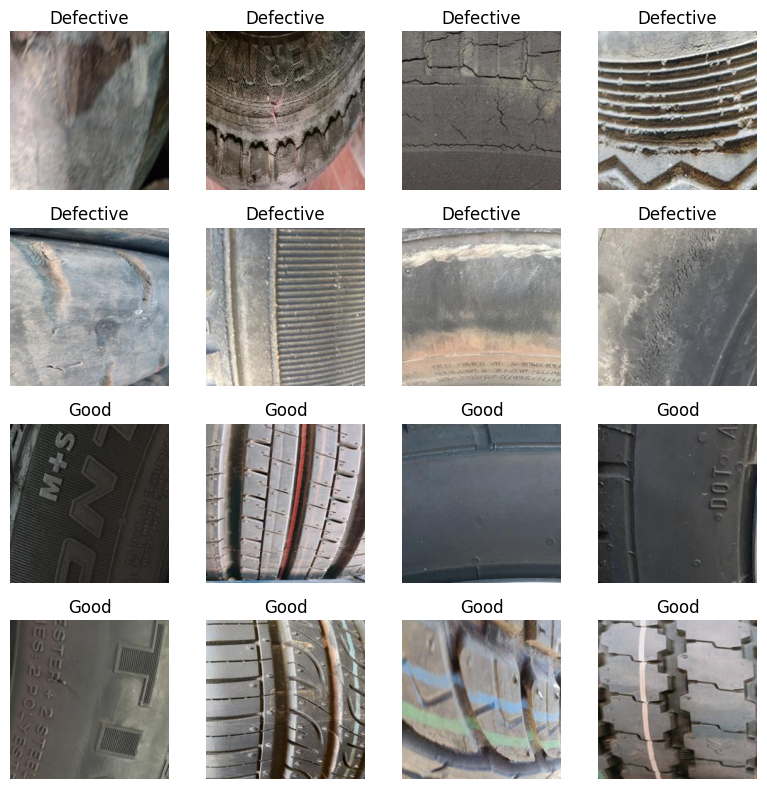

In [14]:
defect_imgs = tuple(glob.glob("../data/processed/train/defective/*"))
good_imgs = tuple(glob.glob("../data/processed/train/good/*"))

example_images = np.hstack((np.random.choice(defect_imgs, 8), np.random.choice(good_imgs, 8)))  # type: ignore
example_labels = ["Defective"] * 8 + ["Good"] * 8

plt.figure(figsize=(8, 8), tight_layout=True, facecolor="white")
for idx, (img_path, label) in enumerate(zip(example_images, example_labels), start=1):
    img = plt.imread(img_path)
    plt.subplot(4, 4, idx)
    plt.imshow(img)
    plt.title(label)
    plt.axis("off")
    
plt.show()